# 1. 데이터 살펴보기

In [1]:
# 라이브러리 및 모듈 호출
from keras.datasets import mnist # 데이터셋
from keras.utils import np_utils # 원핫인코딩
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 시드값 고정
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, Y_class_train),(X_test,Y_class_test) = mnist.load_data()
print(f'학습 데이터 이미지 개수 : {X_train.shape[0]}개')
print(f'테스트 데이터 이미지 개수 : {X_test.shape[0]}개')

print(X_train.shape) # 층,행,열 > 이미지 개수, 세로픽셀수,가로픽셀수

11501568/11490434 [==============================] - 0s 0us/step
학습 데이터 이미지 개수 : 60000개
테스트 데이터 이미지 개수 : 10000개
(60000, 28, 28)


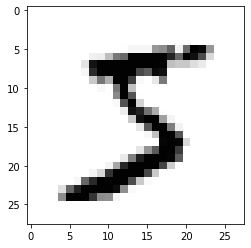

In [3]:
# 이미지로 확인
plt.imshow(X_train[0], cmap='Greys') # 흑백이미지 출력
plt.show()

In [4]:
# 데이터 값 자체로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d   ' % i)
    sys.stdout.write('\n')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18   18   18   126   136   175   26   166   255   247   127   0   0   0   0   
0   0   0   0   0   0   0   0   30   36   94   154   170   253   253   253   253   253   225   172   253   242   195   64   0   0   0   0   
0   0   0   0   0   0   0   49   238   253   253   253   253   253   253   253   253   251   93   82   82   56   39   0   0   0   0   0   
0   0   0   0   0   0   

In [5]:
# 데이터 변환
X_train = X_train.reshape(X_train.shape[0],784) # 2차원 > 1차원으로 변환
X_train = X_train.astype('float64') # normalize를 위해 실수형으로 자료타입 변경
X_train = X_train/255 # 최대값인 255로 나누어줌 > normalize

X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255 # 학습 데이터와 동일하게 적용
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
# 클래스(어떤숫자인지) 값 확인
print(f'class : {Y_class_train[0]}')

# 클래스 데이터를 바이너리화(원핫인코딩)
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0], Y_test[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# 2.간단한 모델로 수행

In [7]:
# 시드값 고정 및 데이터 변환 (위와 동일한 과정)
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 구성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력데이터의 차원 = 784, 노드 수 = 512, 활성화함수 렐루
model.add(Dense(10, activation='softmax')) # 출력은 0~9까지의 숫자 중 하나이므로 10개

# 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 오차함수=범주형 교차엔트로피, 최적화함수=adam, 지표=정확도

# 모델 저장 디렉토리 설정
Model_dir = './model/' # 저장할 경로
if not os.path.exists(Model_dir): # 해당 경로가 없으면 생성
    os.mkdir(Model_dir)
    
modelpath = './model/MNIST_{epoch:02d}_{val_loss:.4f}.hdf5' # 저장할 경로 및 파일명 지정

# 콜백함수 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True) # 성능이 개선될떄만 저장하도록
earlystopping = EarlyStopping(monitor='val_loss', patience=10) # 10번동안 성능개선이 없으면 학습 조기종료

# 모델 실행
history = model.fit(X_train, Y_train, # 학습용 데이터 
                    validation_data=(X_test,Y_test), # 검증용 데이터
                    epochs=30, # 반복횟수
                    batch_size=200, # 한번에 사용할 샘플 개수
                    verbose=0, # 진행상황 미출력
                    callbacks=[checkpointer,earlystopping]) # 콜백함수


Epoch 1: val_loss improved from inf to 0.15254, saving model to ./model/MNIST_01_0.1525.hdf5

Epoch 2: val_loss improved from 0.15254 to 0.10243, saving model to ./model/MNIST_02_0.1024.hdf5

Epoch 3: val_loss improved from 0.10243 to 0.08273, saving model to ./model/MNIST_03_0.0827.hdf5

Epoch 4: val_loss improved from 0.08273 to 0.07048, saving model to ./model/MNIST_04_0.0705.hdf5

Epoch 5: val_loss improved from 0.07048 to 0.06979, saving model to ./model/MNIST_05_0.0698.hdf5

Epoch 6: val_loss improved from 0.06979 to 0.06492, saving model to ./model/MNIST_06_0.0649.hdf5

Epoch 7: val_loss improved from 0.06492 to 0.05843, saving model to ./model/MNIST_07_0.0584.hdf5

Epoch 8: val_loss did not improve from 0.05843

Epoch 9: val_loss did not improve from 0.05843

Epoch 10: val_loss did not improve from 0.05843

Epoch 11: val_loss did not improve from 0.05843

Epoch 12: val_loss did not improve from 0.05843

Epoch 13: val_loss improved from 0.05843 to 0.05625, saving model to ./mod

313/313 [==============================] - 2s 7ms/step - loss: 0.0660 - accuracy: 0.9838
Test Accuracy : 0.9838


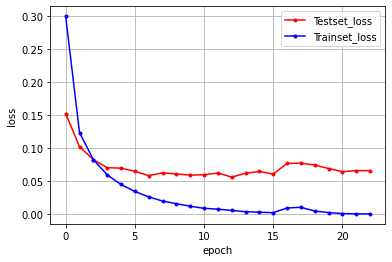

In [8]:
# 결과 출력
print(f'Test Accuracy : {model.evaluate(X_test,Y_test)[1]:.4f}')

# 오차를 그래프로 시각화
y_vloss = history.history['val_loss'] # 테스트셋에 대한 검증 오차
y_loss = history.history['loss'] # 학습셋에 대한 오차

x_len = np.arange(len(y_loss)) # x축으로 사용할 데이터
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Trainset_loss')
plt.legend(loc=0) # 범례 표시
plt.grid() # 격자표시
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 조기종료를 통해 오차가 다시 증가하는(과적합되는) 구간이 없음

# 3.CNN 활용

In [10]:
# 시드값 고정 및 데이터 변환 (위와 동일한 과정)
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 구성
model = Sequential()
model.add(Conv2D(32, # 필터 개수 
                 kernel_size=(3,3), # 필터 사이즈
                 input_shape=(28,28,1), # 입력데이터 형태
                 activation='relu')) # 활성화 함수
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # 2*2사이즈로 맥스풀링
model.add(Dropout(0.25)) # 전체 노드 중에서 드랍할 비율
model.add(Flatten()) # 1차원으로 변경
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정(이전과 동일)
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/MNIST_CNN_{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 결과 출력
print(f'Test Accuracy : {model.evaluate(X_test,Y_test)[1]:.4f}')

In [ ]:
# 오차를 그래프로 시각화
y_vloss = history.history['val_loss'] # 테스트셋에 대한 검증 오차
y_loss = history.history['loss'] # 학습셋에 대한 오차

x_len = np.arange(len(y_loss)) # x축으로 사용할 데이터
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Trainset_loss')
plt.legend(loc=0) # 범례 표시
plt.grid() # 격자표시
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()